In [1]:
import os
import wave
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib
import glob
import csv
import IPython.display as ipd
import random
import subprocess
import matplotlib.pyplot as plt
import tensorflow


In [2]:
path = './train/'

change = [x[0] for x in os.walk(path)]

print(change)

['./train/', './train/albanian', './train/macedonian', './train/synthesized', './train/gujarati', './train/oriya', './train/burmese', './train/bulgarian', './train/malay', './train/yiddish', './train/dutch', './train/korean', './train/tigrigna', './train/punjabi', './train/mende', './train/pashto', './train/ga', './train/czech', './train/serbian', './train/amharic', './train/kurdish', './train/catalan', './train/bavarian', './train/latvian', './train/malayalam', './train/shona', './train/bosnian', './train/vietnamese', './train/hindi', './train/japanese', './train/tajiki', './train/tswana', './train/oromo', './train/uyghur', './train/thai', './train/german', './train/estonian', './train/hadiyya', './train/bafang', './train/kiswahili', './train/ganda', './train/gusii', './train/lithuanian', './train/wolof', './train/hungarian', './train/ewe', './train/dari', './train/urdu', './train/belarusan', './train/slovak', './train/rotuman', './train/romanian', './train/mandarin', './train/uzbek',

In [ ]:
for i in change:
  for j in os.listdir(i):

    now = i+'/'+j
#     if(len(now)) < 4:
#         continue
    if i[-1] == '/':
        continue
    if(now[-1]=='v'):
        continue
#     print(now)
    input_file = now
    output_file = now[:len(now)-3]+"wav"
#     sound = AudioSegment.from_mp3(input_file)
    subprocess.call(['ffmpeg', '-i', now, output_file])
    
    
#     sound.export(output_file, format="wav")
    print(output_file)
#     output_file = "./out/"+j[:len(j)-4]+".wav"
#     sound = AudioSegment.from_mp3(now)
#     sound.export(output_file, "wav")

In [3]:


k = [os.path.split(x[0])[-1] for x in os.walk(path)]
new = [x for x in k if x != '']

# print(new)
fields = ['ID','Class']
rows = []
c = 0
for i in new:
  rows.append([c,i])
  c+=1
name = "data.csv"
# print(rows)
with open(name, 'w') as csvfile: 
    csvwriter = csv.writer(csvfile) 
    csvwriter.writerow(fields) 
    csvwriter.writerows(rows)

df = pd.read_csv(name)
ch = './train/telugu/telugu2.wav'

In [4]:
 ipd.Audio('./train/telugu/telugu2.mp3')
    


In [5]:
data, sampling_rate = librosa.load(ch)


In [6]:
data


array([-3.3972071e-06, -5.4078282e-06, -2.5714953e-05, ...,
       -9.5989162e-07, -1.6140343e-06,  0.0000000e+00], dtype=float32)

In [7]:
sampling_rate

22050

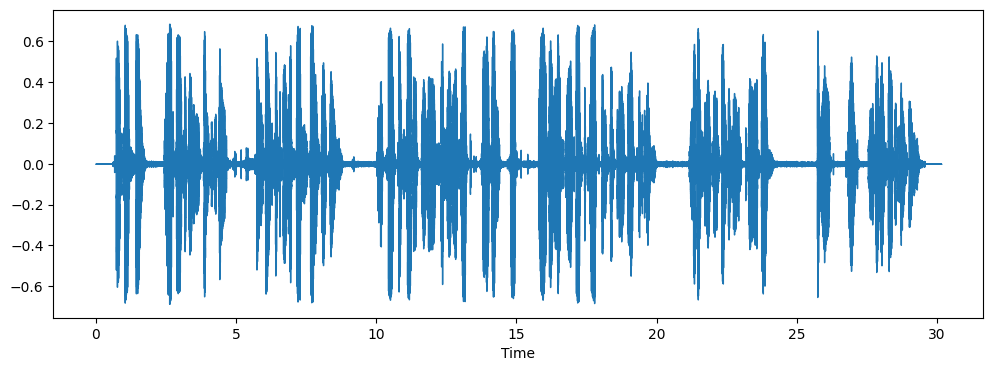

In [8]:

plt.figure(figsize=(12,4))
librosa.display.waveshow(data, sr=sampling_rate)

Class: vlaams


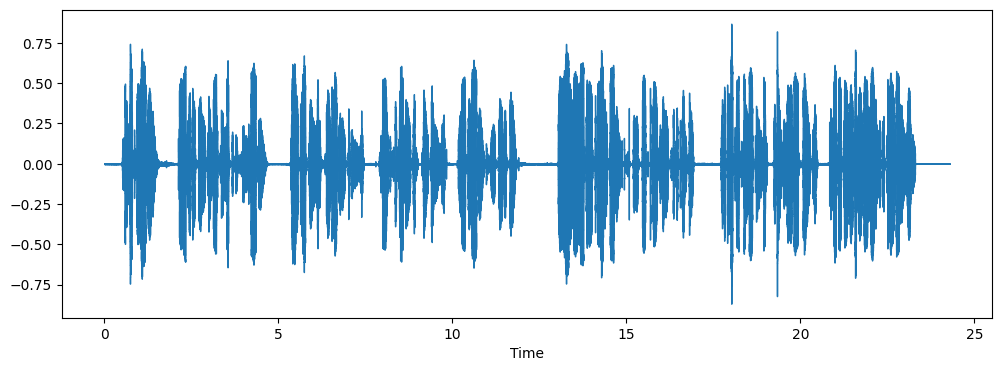

In [9]:
index = random.choice(df.index)
cur = './train/'+str(df['Class'][index])+'/'+str(df['Class'][index])+'2' + '.wav'
print('Class:', df['Class'][index])
data, sampling_rate = librosa.load(cur)



plt.figure(figsize=(12,4))
librosa.display.waveshow(data, sr=sampling_rate)

In [35]:
import os

def parser(row):
    # path of the file
    file_name = os.path.join('Train', str(row.ID) + '.wav')
    path = './train/'+str(df['Class'][row.ID])
#     print(path)
 
    
    for j in os.listdir(path):
        if j[-1] == '3':
            continue
#         print(j)
    file = path+'/'+j
    mfccs 
    if os.path.isfile(file):
        # load the audio file
        x, sample_rate = librosa.load(file, res_type='kaiser_fast')
        # extract features from the data
        mfccs = np.mean(librosa.feature.mfcc(y=x, sr=sample_rate, n_mfcc=40).T, axis=0)
        print(mfccs)
        feature = mfccs
        label = row.Class

    return [feature, label]




In [36]:
data = df.apply(parser, axis=1)
data.columns = ['ID','Class']

UnboundLocalError: local variable 'mfccs' referenced before assignment

In [26]:
data[0]


[array([-3.44469147e+02,  1.27843666e+02,  1.81543159e+00,  4.31656227e+01,
         3.76403141e+00,  6.86091948e+00, -2.78573074e+01, -7.21694469e+00,
         1.28130615e+00, -9.38272953e+00, -9.86168766e+00, -7.26024151e-01,
        -5.12942791e+00, -1.65871887e+01,  7.91481018e+00, -6.81747484e+00,
        -4.65679741e+00,  1.02243483e-01, -1.01682081e+01, -8.09009933e+00,
        -5.85106802e+00, -6.32473469e-01, -5.52311230e+00, -2.68378067e+00,
        -1.87463486e+00, -2.59621334e+00,  9.43509638e-01, -2.80016708e+00,
        -2.32087660e+00,  8.11638772e-01, -2.42271256e+00, -3.76737380e+00,
        -1.54347789e+00,  1.14309955e+00, -1.61461401e+00, -2.23111725e+00,
        -5.92373371e-01, -1.65410948e+00,  2.75189310e-01, -2.66625738e+00],
       dtype=float32),
 'albanian']

In [27]:
X = np.array(list(zip(*data))[0])
y = np.array(list(zip(*data))[1])



In [28]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

le = LabelEncoder()
y = np_utils.to_categorical(le.fit_transform(y))

In [29]:
y[0]


array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)

In [37]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten

num_classes = 122

# model creation
model = Sequential()

model.add(Dense(256, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.compile(loss='mean_absolute_error', metrics='mean_squared_error', optimizer='adam')
# model.compile(loss='categorical_crossentropy', metrics='accuracy', optimizer='adam')

In [34]:
model.fit(X, y, batch_size = 122, epochs=50, validation_split=0.25)


Epoch 1/50
1/1 [==============================] - 0s 113ms/step - loss: 0.0162 - mean_squared_error: 0.0162 - val_loss: 0.0164 - val_mean_squared_error: 0.0164
Epoch 2/50
1/1 [==============================] - 0s 24ms/step - loss: 0.0162 - mean_squared_error: 0.0162 - val_loss: 0.0164 - val_mean_squared_error: 0.0164
Epoch 3/50
1/1 [==============================] - 0s 27ms/step - loss: 0.0162 - mean_squared_error: 0.0162 - val_loss: 0.0164 - val_mean_squared_error: 0.0164
Epoch 4/50
1/1 [==============================] - 0s 19ms/step - loss: 0.0162 - mean_squared_error: 0.0162 - val_loss: 0.0164 - val_mean_squared_error: 0.0164
Epoch 5/50
1/1 [==============================] - 0s 25ms/step - loss: 0.0162 - mean_squared_error: 0.0162 - val_loss: 0.0164 - val_mean_squared_error: 0.0164
Epoch 6/50
1/1 [==============================] - 0s 19ms/step - loss: 0.0162 - mean_squared_error: 0.0162 - val_loss: 0.0164 - val_mean_squared_error: 0.0164
Epoch 7/50
1/1 [=============================